In [1]:
import cv2
from tifffile import tifffile

# Sandstone (1x, 5x)

(6464, 6464)


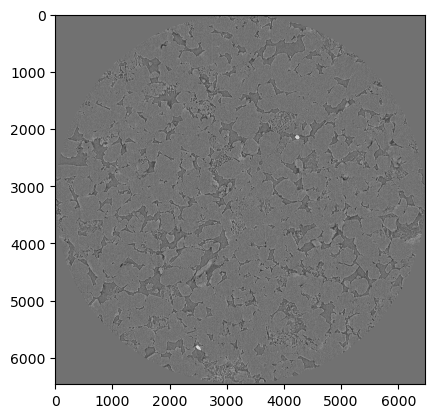

In [69]:
import matplotlib.pyplot as plt

image = tifffile.imread(r'C:\Users\dkoro\PythonProjects\SuperResolution\data\sandstone\5x\recon_00000.tiff')
print(image.shape)

plt.imshow(image, cmap='gray')
plt.show()

(3584, 3584)


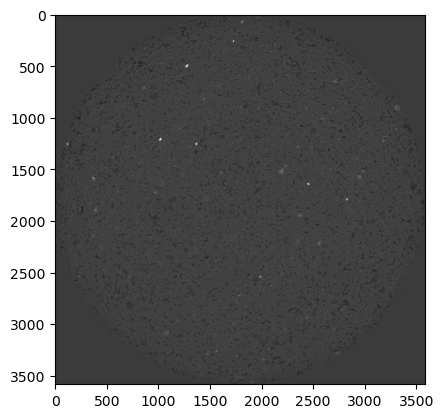

In [79]:
import matplotlib.pyplot as plt

image = tifffile.imread(r'C:\Users\dkoro\PythonProjects\SuperResolution\data\sandstone\1x\recon_00129.tiff')
print(image.shape)

plt.imshow(image, cmap='gray')
plt.show()

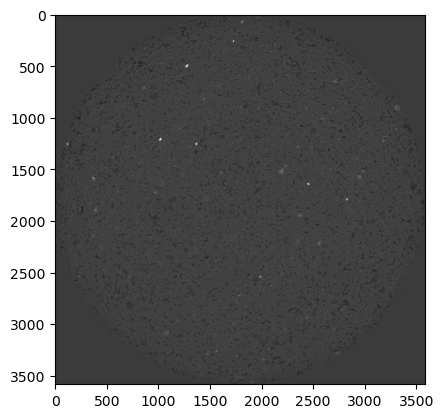

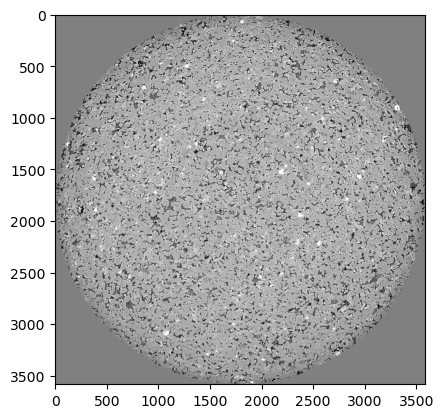

In [80]:
def tiff2rgb(image: np.ndarray) -> np.ndarray:
    min_v = image.min()
    max_v = image.max()
    image = (image - min_v) / (max_v - min_v + 1e-16)
    
    min_p = np.percentile(image, 1, axis=(0, 1))
    max_p = np.percentile(image, 99, axis=(0, 1))
    image = np.clip(image, min_p, max_p)
    
    return np.clip((image * 255.0).round(), 0, 255)


plt.imshow(image, cmap='gray')
plt.show()

image = tiff2rgb(image)

plt.figure()
plt.imshow(image, cmap='gray')
plt.show()

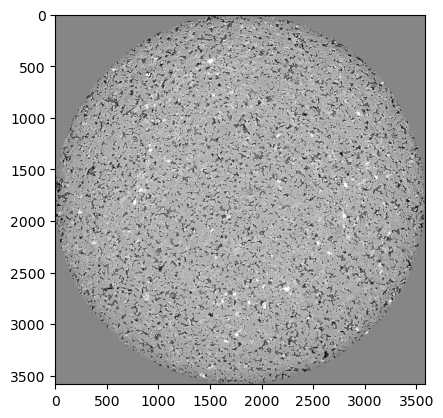

In [76]:
plt.imshow(image, cmap='gray')
plt.show()

image = tiff2rgb(image)

plt.figure()
plt.imshow(image, cmap='gray')
plt.show()

In [98]:
image.shape

(3584, 3584)

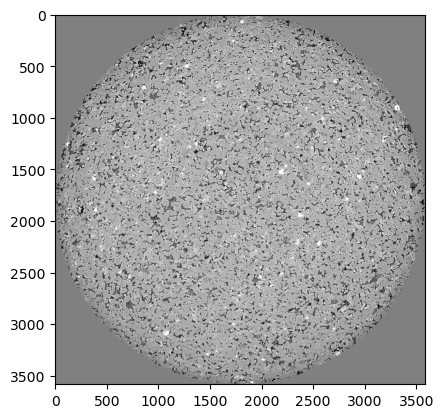

In [101]:
img_r = cv2.imread(r'C:\Users\dkoro\PythonProjects\SuperResolution\data\rgb\1x\recon_00129.png')
plt.imshow(img_r[:,:, 0], cmap='gray')
plt.show()

In [102]:
img_r.shape

(3584, 3584, 3)

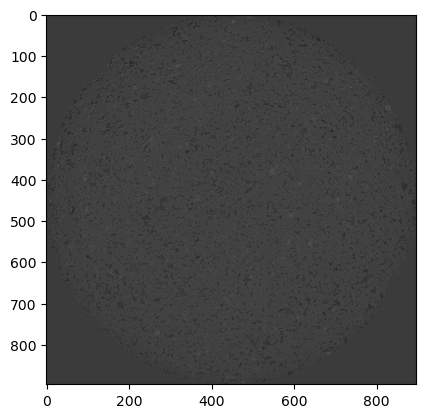

In [103]:
plt.imshow(cv2.resize(img_r, (3584//4, 3584//4)), cmap='gray')
plt.show()

# Glass (1x, 5x)

(6464, 6464)


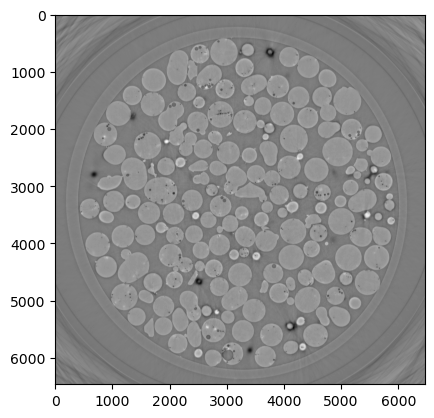

In [73]:
import matplotlib.pyplot as plt

image = tifffile.imread(r'C:\Users\dkoro\PythonProjects\SuperResolution\data\synt_glass\5x\recon_00000.tiff')
print(image.shape)

plt.imshow(image, cmap='gray')
plt.show()

(1024, 1024)


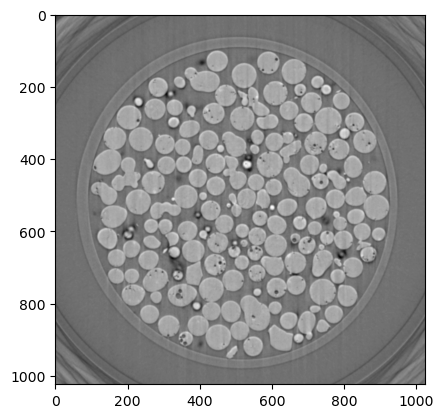

In [11]:
import matplotlib.pyplot as plt

image = tifffile.imread(r'C:\Users\dkoro\PythonProjects\SuperResolution\data\synt_glass\1x\recon_00000.tiff')
print(image.shape)

plt.imshow(image, cmap='gray')
plt.show()

In [16]:
image.min(), image.max()

(-0.00054930896, 0.000640608)

# Compare sandstone 5x

In [9]:
import cv2
import os

data_path = r'C:\Users\dkoro\PythonProjects\SuperResolution\data\real_compare_sr\sandstone'

image_lr = cv2.resize(cv2.imread(os.path.join(data_path, 'recon_00000_s001.png')), (4096, 4096))[:,:,0]
image_sr = cv2.imread(os.path.join(data_path, 'recon_00000_s001_out.png'))[:,:,0]
image_hr = cv2.imread(os.path.join(data_path, 'recon_00000_s001_5x.png'))[:,:,0]
image_lr.shape, image_sr.shape, image_hr.shape

((4096, 4096), (4096, 4096), (4096, 4096))

In [3]:
import cv2
import os

data_path = r'C:\Users\dkoro\PythonProjects\SuperResolution\data\real_compare_sr\glass'

image_lr = cv2.resize(cv2.imread(os.path.join(data_path, 'recon_00001.png')), (4096, 4096))[:,:,0]
image_sr = cv2.imread(os.path.join(data_path, 'recon_00001_out.png'))[:,:,0]
image_lr.shape, image_sr.shape

((4096, 4096), (4096, 4096))

In [11]:
import cv2
import os

data_path = r'C:\Users\dkoro\PythonProjects\SuperResolution\data\real_compare_sr\sandstone\0'

image_lr = cv2.resize(cv2.imread(os.path.join(data_path, 'recon_00000_s010.png')), (4096, 4096))[:,:,0]
image_sr = cv2.imread(os.path.join(data_path, 'recon_00000_s010_out.png'))[:,:,0]
image_lr.shape, image_sr.shape

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [12]:
import cv2
import os

data_path = r'C:\Users\dkoro\PythonProjects\SuperResolution\data\real_compare_sr\sandstone_fast'

image_lr = cv2.resize(cv2.imread(os.path.join(data_path, 'recon_00000.png')), (4096, 4096))[:,:,0]
image_sr = cv2.imread(os.path.join(data_path, 'recon_00000_out.png'))[:,:,0]
image_lr.shape, image_sr.shape

((4096, 4096), (4096, 4096))

In [15]:
import cv2
import os

data_path = r'C:\Users\dkoro\PythonProjects\SuperResolution\data\real_compare_sr\sandstone_fast\0_bench'

image_lr = cv2.resize(cv2.imread(os.path.join(data_path, 'recon_00000.png')), (4096, 4096))[:,:,0]
image_sr = cv2.imread(os.path.join(data_path, 'recon_00000_out.png'))[:,:,0]
image_lr.shape, image_sr.shape

((4096, 4096), (4096, 4096))

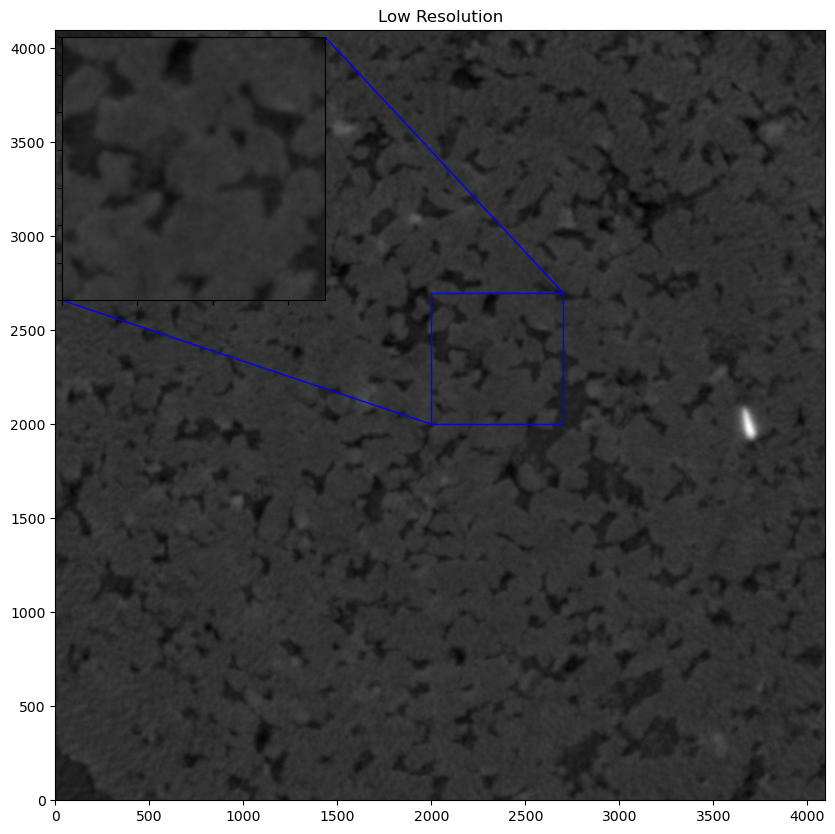

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import PIL


def plot_results(img, region, prefix, title):
    """Plot the result with zoom-in area."""
    img_array = img
    img_array = img_array.astype("float32")

    # Create a new figure with a default 111 subplot.
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(img_array[::-1], origin="lower", cmap='gray')

    plt.title(title)
    # zoom-factor: 2.0, location: upper-left
    axins = zoomed_inset_axes(ax, 2, loc=2)
    axins.imshow(img_array[::-1], origin="lower", cmap='gray')

    # Specify the limits.
    x1, x2, y1, y2 = region
    # Apply the x-limits.
    axins.set_xlim(x1, x2)
    # Apply the y-limits.
    axins.set_ylim(y1, y2)

    plt.yticks(visible=False)
    plt.xticks(visible=False)

    # Make the line.
    mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="blue")
    plt.savefig(str(prefix) + "-" + title + ".png", bbox_inches='tight')
    plt.show()
    
region = (2000, 2700, 2000, 2700)
plot_results(image_lr, region, '512', 'Low Resolution')

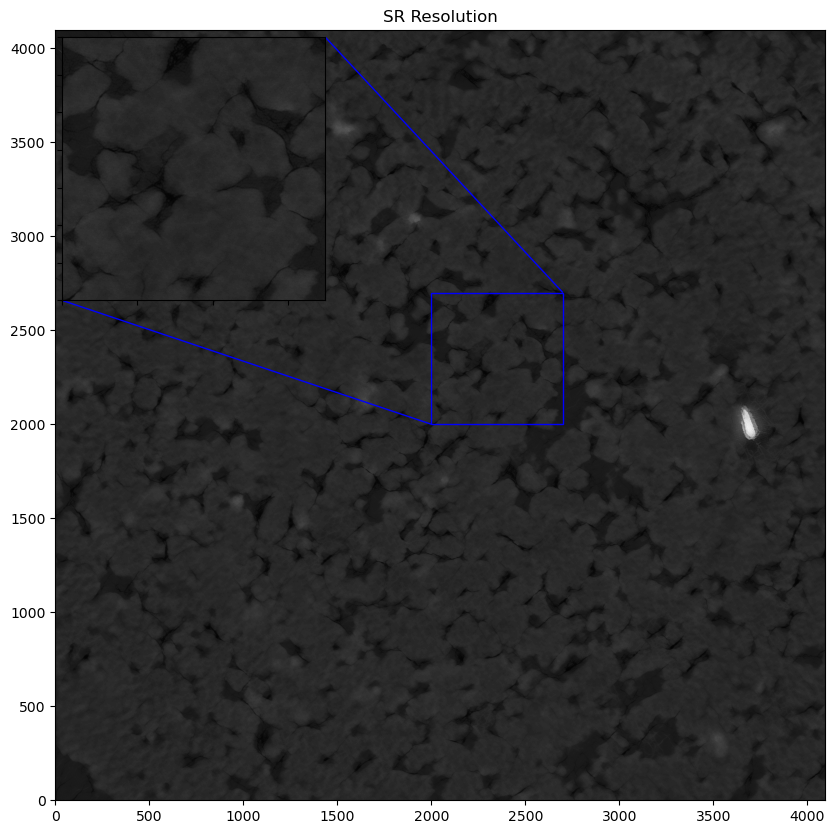

In [17]:
plot_results(image_sr, region, '512', 'SR Resolution')

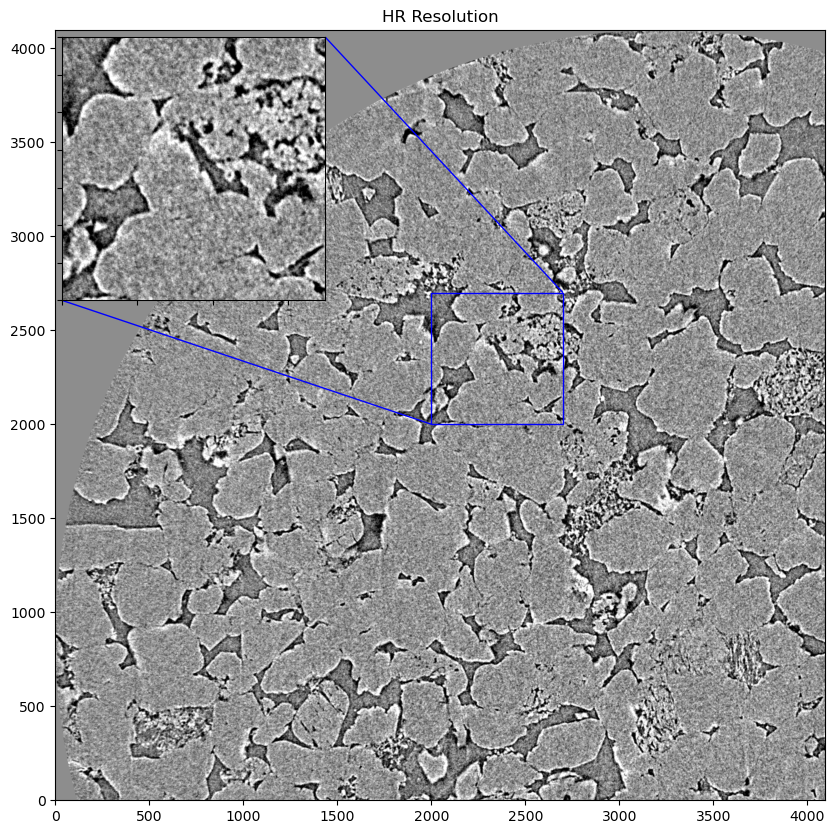

In [21]:
plot_results(image_hr, region, '512', 'HR Resolution')